In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import torch

#from itertools import product
from pynwb import NWBHDF5IO 
from nlb_tools.nwb_interface import NWBDataset

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 'dandi download' downloads the data in this folder:
datapath = '/home/makki/data/NLB/000128/sub-Jenkins/sub-Jenkins_ses-full_desc-train_behavior+ecephys.nwb'
dataset = NWBDataset(datapath)

# Extract neural data and lagged hand velocity.
binsize = 20 #ms
dataset.resample(binsize)

trial_info = dataset.trial_info

# Combining the number of columns in the 'spikes' field with those in the 'heldout_spikes' field gives the total number of neurons.
n_null_trials = trial_info.isnull().sum()['success']
n_neurons = dataset.data.spikes.values.shape[1] + dataset.data.heldout_spikes.values.shape[1]

print(f'number of neurons: {n_neurons}')
print(f'total number of trials: {len(trial_info)}')
print(f'number of null trials: {n_null_trials}')

number of neurons: 182
total number of trials: 2295
number of null trials: 0


In [4]:
trial_info

,trial_id,start_time,end_time,trial_type,trial_version,maze_id,success,target_on_time,go_cue_time,move_onset_time,rt,delay,num_targets,target_pos,num_barriers,barrier_pos,active_target,split
0,0,0 days 00:00:00,0 days 00:00:03.321000,25,2,84,True,0 days 00:00:00.880000,0 days 00:00:01.478000,0 days 00:00:01.905000,427,598,3,"[[-111, -82], [-108, 81], [118, 72]]",8,"[[69, 31, 14, 99], [69, 54, 5, 101], [-62, -48...",2,val
1,1,0 days 00:00:03.400000,0 days 00:00:06.521000,3,1,3,True,0 days 00:00:04.291000,0 days 00:00:04.739000,0 days 00:00:05.280000,541,448,1,"[[-116, -5]]",6,"[[-69, -16, 13, 69], [-120, -62, 83, 15], [95,...",0,val
2,2,0 days 00:00:06.600000,0 days 00:00:09.856000,22,1,66,True,0 days 00:00:07.471000,0 days 00:00:07.969000,0 days 00:00:08.346000,377,498,1,"[[-82, -86]]",9,"[[34, -41, 86, 8], [9, -42, 33, 19], [7, -41, ...",0,train
3,3,0 days 00:00:09.900000,0 days 00:00:12.946000,29,2,100,True,0 days 00:00:10.853000,0 days 00:00:11.335000,0 days 00:00:11.752000,417,482,3,"[[-109, 2], [2, 82], [132, -65]]",9,"[[-9, 52, 43, 8], [-50, 91, 14, 64], [-133, -5...",1,train
4,4,0 days 00:00:13,0 days 00:00:15.481000,21,0,65,True,0 days 00:00:13.687000,0 days 00:00:14.235000,0 days 00:00:14.507000,272,548,1,"[[27, 82]]",0,[],0,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,2290,0 days 01:55:36.600000,0 days 01:55:39.796000,34,1,91,True,0 days 01:55:37.362000,0 days 01:55:38.277000,0 days 01:55:38.585000,308,915,1,"[[116, -77]]",7,"[[66, -43, 30, 9], [-66, 1, 11, 70], [-35, 50,...",0,train
2291,2291,0 days 01:55:39.900000,0 days 01:55:42.736000,15,1,75,True,0 days 01:55:40.717000,0 days 01:55:41.265000,0 days 01:55:41.641000,376,548,1,"[[133, -81]]",9,"[[-33, 47, 37, 6], [-77, 48, 61, 11], [-64, -2...",0,train
2292,2292,0 days 01:55:42.800000,0 days 01:55:45.766000,23,0,67,True,0 days 01:55:43.465000,0 days 01:55:44.396000,0 days 01:55:44.714000,318,931,1,"[[94, -86]]",0,[],0,train
2293,2293,0 days 01:55:45.800000,0 days 01:55:49.201000,25,2,84,True,0 days 01:55:46.631000,0 days 01:55:46.663000,0 days 01:55:47.616000,953,32,3,"[[-111, -82], [-108, 81], [118, 72]]",8,"[[69, 31, 14, 99], [69, 54, 5, 101], [-62, -48...",2,val


In [5]:
for column in trial_info.columns:
    print(column)

trial_id
start_time
end_time
trial_type
trial_version
maze_id
success
target_on_time
go_cue_time
move_onset_time
rt
delay
num_targets
target_pos
num_barriers
barrier_pos
active_target
split


In [6]:
trial_info['trial_type'].value_counts()

25    75
3     69
21    68
37    68
33    67
29    67
26    67
8     66
38    66
34    66
15    66
35    65
7     65
11    65
9     65
12    64
10    64
16    64
1     64
31    64
13    63
32    63
5     63
28    63
30    63
20    62
17    62
22    61
19    60
2     60
23    60
39    60
6     60
18    58
36    57
24    55
Name: trial_type, dtype: int64

In [7]:
trial_info['success'].value_counts()

True    2295
Name: success, dtype: int64

In [8]:
# Note that there is a number of trials at the begining of the session(s) that has no metadata at all.
# The NWBDataset function: make_trial_data() drops all of those.

print(f"Total num of trials: {len(trial_info)}\n")
print("Count of null values in each column:\n")

trial_info.isnull().sum()

Total num of trials: 2295

Count of null values in each column:



trial_id           0
start_time         0
end_time           0
trial_type         0
trial_version      0
maze_id            0
success            0
target_on_time     0
go_cue_time        0
move_onset_time    0
rt                 0
delay              0
num_targets        0
target_pos         0
num_barriers       0
barrier_pos        0
active_target      0
split              0
dtype: int64

In [9]:
# Number of all time bins in the entire dataset.
# That's right, each row is the measures in one time bin.
# Also, the original sampling rate is 100Hz (10ms bin size).
# Keep in mind that not all the trials are the same length.

len(dataset.data)

347616

In [10]:
# The make_trial_data() returns a DataFrame containing trialized data. It has the same fields as the continuous `dataset.data` DataFrame,
# But adds `trial_id`, `trial_time`, and `align_time`. Till here, each row is still a time bin.
# Note: Later we do the cropping and alignment arount move_onset by ourselves.

trial_data = dataset.make_trial_data()
len(trial_data)

341796

In [11]:
trial_data

align_time             clock_time  cursor_pos             \
                                                               x          y   
0             0 days 00:00:00        0 days 00:00:00   -0.451274  -2.949204   
1      0 days 00:00:00.020000 0 days 00:00:00.020000   -0.893703  -5.597856   
2      0 days 00:00:00.040000 0 days 00:00:00.040000   -0.650206  -3.859423   
3      0 days 00:00:00.060000 0 days 00:00:00.060000   -0.436515  -3.358260   
4      0 days 00:00:00.080000 0 days 00:00:00.080000   -0.814560  -2.544270   
...                       ...                    ...         ...        ...   
341791 0 days 00:00:02.920000 0 days 01:55:52.220000 -112.157422 -78.151516   
341792 0 days 00:00:02.940000 0 days 01:55:52.240000 -117.653814 -82.072535   
341793 0 days 00:00:02.960000 0 days 01:55:52.260000 -109.119320 -76.158658   
341794 0 days 00:00:02.980000 0 days 01:55:52.280000 -124.419426 -86.633496   
341795        0 days 00:00:03 0 days 01:55:52.300000  -60.050020 -41.821501   

           eye_pos                hand_pos               hand_vel             \
                 x           y           x           y          x          y   
0         4.084530    1.111784   -0.381959  -21.215487  -2.425091  17.355936   
1         8.325344    2.889298   -0.797850  -43.318597   4.643840  48.770275   
2         6.678371    2.090264   -0.510234  -36.967887   8.876738  40.972856   
3         8.315648    1.082960   -0.637032  -39.296861 -17.474265  28.879911   
4         7.223485    2.330878   -1.075421  -36.883491 -24.917623  14.940031   
...            ...         ...         ...         ...        ...        ...   
341791  -94.874553 -115.656883 -112.139612 -112.541082   0.987807  -1.461489   
341792 -100.624206 -121.548892 -117.664522 -118.125101   0.577781   1.171330   
341793  -92.115726 -111.707270 -109.149068 -109.479847  -0.325958   5.912751   
341794 -105.186120 -128.448711 -124.400922 -124.800202   1.295633  -5.988207   
341795  -50.311010  -61.712151  -60.023736  -60.282788   0.864252  -0.981965   

        ... spikes                                    trial_id  \
        ...   2861 2862 2871 2881 2911 2931 2951 2961            
0       ...    0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0        0   
1       ...    0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0        0   
2       ...    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
3       ...    0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0        0   
4       ...    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0        0   
...     ...    ...  ...  ...  ...  ...  ...  ...  ...      ...   
341791  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
341792  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
341793  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
341794  ...    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
341795  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   

                   trial_time  
                               
0             0 days 00:00:00  
1      0 days 00:00:00.020000  
2      0 days 00:00:00.040000  
3      0 days 00:00:00.060000  
4      0 days 00:00:00.080000  
...                       ...  
341791 0 days 00:00:02.920000  
341792 0 days 00:00:02.940000  
341793 0 days 00:00:02.960000  
341794 0 days 00:00:02.980000  
341795        0 days 00:00:03  

[341796 rows x 195 columns]

In [12]:
trial_info[trial_info['success'] == False]

,trial_id,start_time,end_time,trial_type,trial_version,maze_id,success,target_on_time,go_cue_time,move_onset_time,rt,delay,num_targets,target_pos,num_barriers,barrier_pos,active_target,split


In [13]:
np.isnan(trial_data['spikes'].to_numpy().flatten()).any()

False

In [14]:
np.isnan(trial_data['heldout_spikes'].to_numpy().flatten()).any()

False

### Making the trials

In [15]:
trials = [trial[1] for trial in trial_data.groupby('trial_id')]
len(trials)

2295

<function matplotlib.pyplot.show(close=None, block=None)>

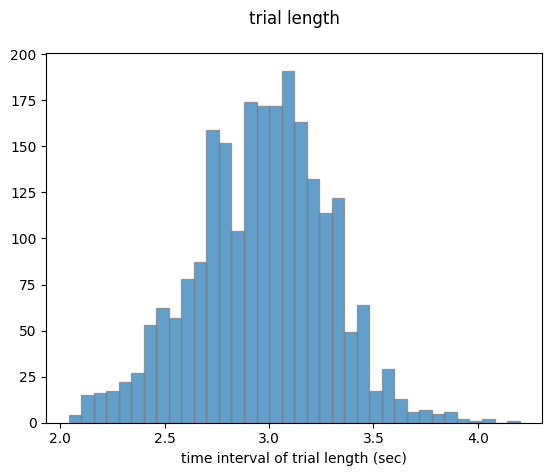

In [16]:
trial_lens = []

for trial_id, trial in trial_data.groupby('trial_id'):
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    trial_lens.append((trial.trial_time.values[-1] / np.timedelta64(1, 's')) - (trial.trial_time.values[0] / np.timedelta64(1, 's')))
    
plt.hist(trial_lens, bins='auto', density=False, alpha=0.7, edgecolor='gray')

plt.title('trial length\n')
plt.xlabel('time interval of trial length (sec)')
#plt.savefig('output_figs/tl.png')
plt.show

In [17]:
(trial_info[trial_info['trial_id'] == 1]['start_time'].values[0] / np.timedelta64(1, 's')) 

3.4

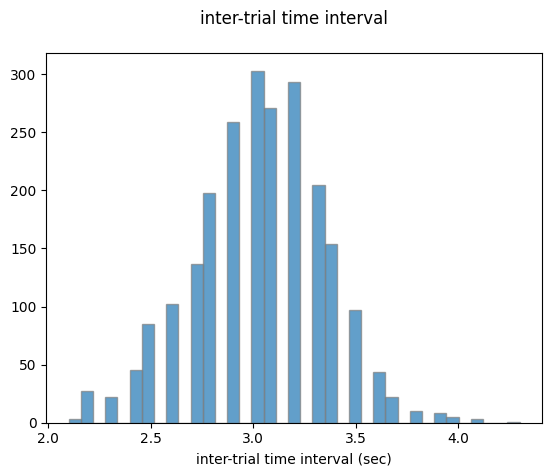

In [22]:
inter_trial_intervals = []
    
for trial_id in range(len(trials)-1):
    trial_id_next = trial_id + 1
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    trial_id_trial_info_next = trial_info[trial_info['trial_id'] == trial_id_next]
    
    inter_trial_intervals.append((trial_id_trial_info_next['start_time'].values[0] / np.timedelta64(1, 's')) - (trial_id_trial_info['start_time'].values[0] / np.timedelta64(1, 's')))
    
plt.hist(inter_trial_intervals, bins='auto', density=False, alpha=0.7, edgecolor='gray')

plt.title('inter-trial time interval\n')
plt.xlabel('inter-trial time interval (sec)')
#plt.savefig('output_figs/iit.png')
plt.show()

In [19]:
len(trials)

2295

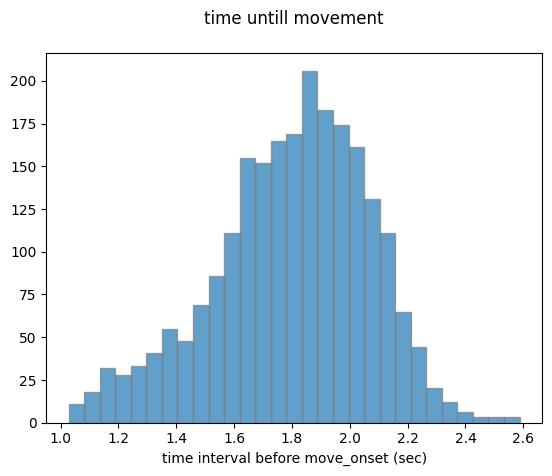

In [20]:
time_utill_move = []

for trial_id in range(len(trials)):
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    time_utill_move.append((trial_id_trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 's')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 's')))
    
plt.hist(time_utill_move, bins='auto', density=False, alpha=0.7, edgecolor='gray')
plt.title('time untill movement\n')
plt.xlabel('time interval before move_onset (sec)')
#plt.savefig('output_figs/tibm.png')
plt.show()

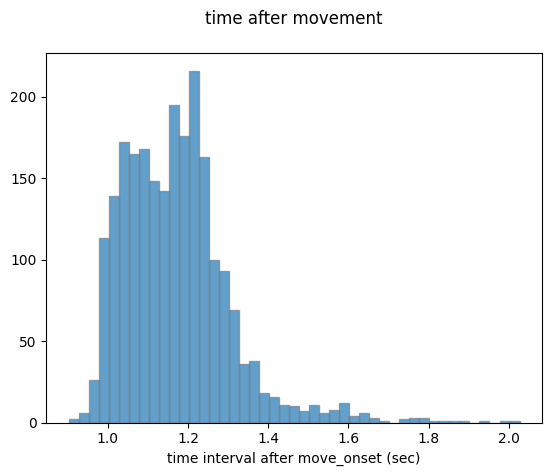

In [21]:
time_after_move = []

for trial_id in range(len(trials)):
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    time_after_move.append((trial_id_trial_info['end_time'].iloc[0] / np.timedelta64(1, 's')) - (trial_id_trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 's')))
    
plt.hist(time_after_move, bins='auto', density=False, alpha=0.7, edgecolor='gray')
plt.title('time after movement\n')
plt.xlabel('time interval after move_onset (sec)')
#plt.savefig('output_figs/tiam.png')
plt.show()

### Forming conditions

In [25]:
def get_simple_cond(angle):
        
    if 350 <= angle < 360 or 0 <= angle < 38:
        return 0
    elif 38 <= angle < 125:
        return 1
    elif 125 <= angle < 175:
        return 2
    elif 175 <= angle < 212:
        return 3
    elif 212 <= angle < 232:
        return 4
    elif 232 <= angle < 280:
        return 5
    elif 280 <= angle <= 329:
        return 6
    elif 329 <= angle <= 350:
        return 7
    else:
        raise ValueError("Angle out of range")

def n_unigue_conds(trial_conds):
    # Convert each list to a frozenset and use a set to track unique frozensets
    unique_conds = set(frozenset(cond) for cond in trial_conds)
    return len(unique_conds)

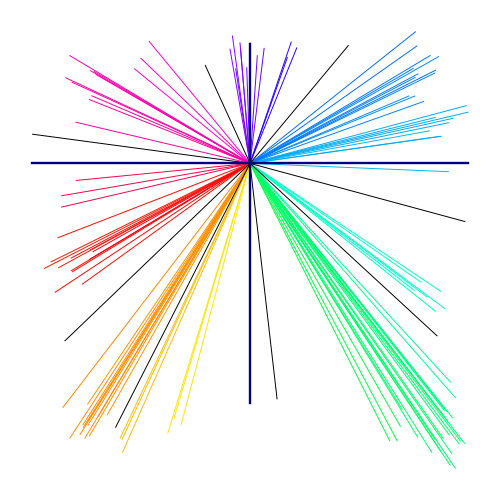

In [26]:
## Plot trial-averaged reaches

# Find unique conditions
conds = trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()
conds = [cond for cond in conds if not any(math.isnan(x) for x in cond)]

# Initialize plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Loop over conditions and compute average trajectory
for cond in conds:
    # Find trials in condition
    mask = np.all(trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    # Extract trial data
    trial_d = dataset.make_trial_data(ignored_trials=(~mask))
    # Average hand position across trials
    traj = trial_d.groupby('align_time')[[('hand_pos', 'x'), ('hand_pos', 'y')]].mean().to_numpy()
    # Determine reach angle for color
    active_target = trial_info[mask].target_pos.iloc[0][int(dataset.trial_info[mask].active_target.iloc[0])]
    reach_angle = np.arctan2(*active_target[::-1])
    # Plot reach
    ax.plot([0, traj[:, 0][-1]], [0, traj[:, 1][-1]], linewidth=0.7, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))

angle_radians = np.radians(350)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')
'''
angle_radians = np.radians(16)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')
'''
angle_radians = np.radians(38)
x_end = 80 * np.cos(angle_radians)
y_end = 80 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(125)
x_end = 50 * np.cos(angle_radians)
y_end = 50 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(175)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')
'''
angle_radians = np.radians(193)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')
'''
angle_radians = np.radians(212)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(232)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(280)
x_end = 100 * np.cos(angle_radians)
y_end = 100 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(329)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(0)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=1.7, color='navy')

angle_radians = np.radians(90)
x_end = 50 * np.cos(angle_radians)
y_end = 50 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=1.7, color='navy')

angle_radians = np.radians(180)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=1.7, color='navy')

angle_radians = np.radians(270)
x_end = 100 * np.cos(angle_radians)
y_end = 100 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=1.7, color='navy')

plt.axis('off')
plt.show()

In [33]:
# Find unique conditions
maze_conds = [cond for cond in trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist() if not any(math.isnan(x) for x in cond)]
orig_conds = {}

# Loop over conditions and compute average trajectory
for cond_idx, cond in enumerate(maze_conds):
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    trial_d = dataset.make_trial_data()
    orig_conds[cond_idx] = trial_d.trial_id.drop_duplicates().values

In [32]:
orig_conds

{0: array([   0,   17,   66,  148,  354,  504,  694,  783, 1064, 1179, 1342,
        1409, 1411, 1812, 1815, 1844, 1852, 1980, 2071, 2118, 2158, 2293]),
 1: array([   1,  104,  124,  185,  278,  397,  572,  589,  590,  705,  871,
         899,  946,  977, 1030, 1066, 1431, 1620, 1832, 1928, 1998, 2039,
        2106, 2143]),
 2: array([   2,  125,  443,  489,  704,  717,  797, 1336, 1398, 1470, 1646,
        1659, 1755, 1770, 1968, 1973, 2081, 2150]),
 3: array([   3,   67,   80,  160,  274,  294,  654,  670,  706,  713,  822,
         897, 1044, 1106, 1281, 1374, 1436, 1589, 1594, 2010, 2033, 2076,
        2087, 2102, 2151]),
 4: array([   4,   89,  200,  286,  349,  394,  408,  415,  438,  619,  762,
         958,  984, 1025, 1234, 1241, 1277, 1367, 1419, 1420, 1442, 1825,
        1861, 1962, 2278]),
 5: array([   5,   10,  111,  112,  122,  246,  250,  428,  511,  567,  721,
         845,  870, 1016, 1050, 1155, 1376, 1383, 1513, 1680, 1855, 1936,
        2047]),
 6: array([   6,   7

In [30]:
len(maze_conds)

108

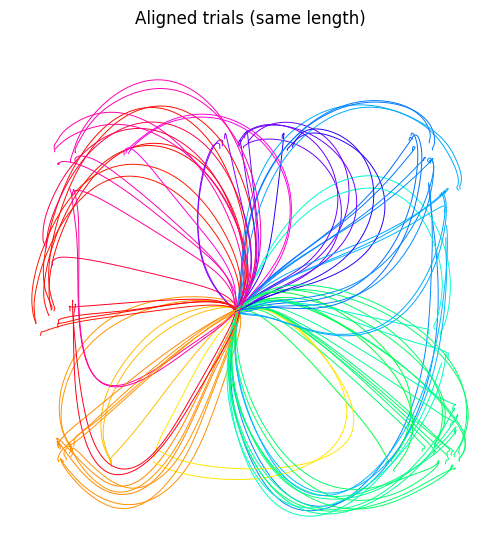

In [21]:
## Plot trial-averaged reaches

# Find unique conditions
maze_conds = trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()
maze_conds = [cond for cond in maze_conds if not any(math.isnan(x) for x in cond)]

orig_conds = {}
simp_conds = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Aligned trials (same length)')
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Loop over conditions and compute average trajectory
for cond_idx, cond in enumerate(maze_conds):
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    trial_d = dataset.make_trial_data(align_field='move_onset_time', align_range=(-240, 660), ignored_trials=(~mask))
    traj = trial_d.groupby('align_time')[[('hand_pos', 'x'), ('hand_pos', 'y')]].mean().to_numpy()
    # Determine reach angle for color
    reach_angle = np.arctan2(*trial_info[mask].target_pos.iloc[0][int(trial_info[mask].active_target.iloc[0])][::-1])
    # Plot reach
    ax.plot(traj[:, 0], traj[:, 1], linewidth=0.7, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))
    
    orig_conds[cond_idx] = trial_d.trial_id.drop_duplicates().values
    simp_conds[get_simple_cond(math.degrees(reach_angle) + 360 / 2)].append(trial_d.trial_id.drop_duplicates().values)

simp_conds = {key: np.concatenate(value) for key, value in simp_conds.items()}
    
plt.axis('off')
plt.show()

In [22]:
conds = []
for trial_id, trial in trial_data.groupby('trial_id'):
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    for cond, trial_ids in orig_conds.items():
        if trial_id in trial_ids:
            conds.append(cond)
            break
            
maze_conds = torch.tensor(maze_conds)
conds = torch.tensor(conds)

print(maze_conds.shape)
print(conds.shape)

torch.Size([108, 2])
torch.Size([2294])


In [23]:
_, cond_counts = torch.unique(conds, return_counts=True)
cond_counts

tensor([22, 24, 18, 25, 25, 23, 22, 27, 19, 26, 23, 24, 18, 17, 23, 18, 21, 24,
        20, 21, 20, 22, 18, 19, 25, 25, 20, 23, 24, 24, 21, 21, 22, 22, 19, 22,
        20, 20, 20, 18, 22, 21, 19, 22, 22, 22, 23, 22, 21, 21, 26, 19, 24, 22,
        20, 19, 20, 19, 24, 22, 22, 22, 20, 22, 21, 22, 18, 22, 23, 22, 20, 24,
        19, 19, 21, 21, 22, 18, 17, 22, 22, 22, 24, 18, 22, 21, 19, 19, 22, 22,
        21, 22, 21, 21, 19, 20, 20, 19, 22, 22, 23, 20, 20, 22, 22, 20, 19, 18])

## Forming trials and label vectors

In [25]:
#[col for col in trial_data.columns if any(_ in col for _ in ['vel', 'pos', 'force', 'acc', 'target'])]
label_cols = [col for col in trial_data.columns if any(_ in col for _ in ['x', 'y'])]

In [26]:
label_cols

[('cursor_pos', 'x'),
 ('cursor_pos', 'y'),
 ('eye_pos', 'x'),
 ('eye_pos', 'y'),
 ('hand_pos', 'x'),
 ('hand_pos', 'y'),
 ('hand_vel', 'x'),
 ('hand_vel', 'y')]

In [61]:
# Align the trials arount the move_onset bin with offsets before and after that bin.
y = []
labels = []
target_pos = []
active_target = []
conds = []

# We want total trial length of 900ms, which is 90 time bins.
bins_before_move = 48
bins_after_move = 132

trial_length = bins_before_move + bins_after_move
n_trials = trial_data.shape[0] // trial_length

for trial_id, trial in trial_data.groupby('trial_id'):
    trial_id_info = trial_info[trial_info['trial_id'] == trial_id]
            
    # Get the untill movement in ms.
    move_time = (trial_id_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))
    # Get the number of bins until movement.
    move_bin = int(move_time // binsize)

    y_heldin_t = torch.tensor(trial.spikes.values)
    y_heldout_t = torch.tensor(trial.heldout_spikes.values)
    
    # Crop the trials arount the move_onset bin with offsets before and after that bin.
    y_t = torch.concat(
        [y_heldin_t[move_bin-bins_before_move:move_bin+bins_after_move, :], y_heldout_t[move_bin-bins_before_move:move_bin+bins_after_move, :]], dim=-1
    )
    
    y.append(y_t.reshape(1, trial_length, n_neurons))
    labels.append(torch.tensor(trial.cursor_pos.values[move_bin-bins_before_move:move_bin+bins_after_move, :]).reshape(1, trial_length, 2))
    
    target_pos.append(trial_id_info.target_pos.values[0])
    active_target.append(int(trial_id_info.active_target.values[0]))
    
    for cond, trial_ids in orig_conds.items():
        if trial_id in trial_ids:
            conds.append(cond)
    
y = torch.concat(y, dim=0)
labels = torch.concat(labels, dim=0)
conds = torch.tensor(conds)
active_target = torch.tensor(active_target)

print(y.shape)
print(labels.shape)
print(conds.shape)
print(len(target_pos))
print(active_target.shape)

torch.Size([2294, 180, 182])
torch.Size([2294, 180, 2])
torch.Size([2294])
2294
torch.Size([2294])


### Forming events occurance time bins

In [74]:
for i, _ in enumerate(trials):
    trial_id = i + n_null_trials
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    target_on = (((trial_id_trial_info['target_on_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    gocue = (((trial_id_trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    move_onset = (((trial_id_trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)

In [75]:
target_bins = []
gocue_bins = []
move_bins = []
event_bins = []

for i, _ in enumerate(trials):
    trial_id = i + n_null_trials
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    # target : go
    delay = (((trial_id_trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['target_on_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    # go : move
    prep = (((trial_id_trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    
    target_on = (((trial_id_trial_info['target_on_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    gocue = (((trial_id_trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    move_onset = (((trial_id_trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    
    target_bins.append(target_on - move_onset + bins_before_move)
    gocue_bins.append(gocue - move_onset + bins_before_move)
    move_bins.append(bins_before_move)

event_bins.append(torch.tensor(target_bins))
event_bins.append(torch.tensor(gocue_bins))
event_bins.append(torch.tensor(move_bins))
event_bins = torch.stack(event_bins)
event_bins.shape

torch.Size([3, 2294])

In [76]:
event_bins = event_bins.permute(1, 0)

event_bins[event_bins < 0] = float('nan')
event_bins[event_bins > bins_before_move + bins_after_move] = float('nan')
event_bins.shape

torch.Size([2294, 3])

In [77]:
event_bins

tensor([[nan, nan, 48.],
        [nan, nan, 48.],
        [nan, nan, 48.],
        ...,
        [nan, nan, 48.],
        [nan, nan, 48.],
        [nan, nan, 48.]])

### Save data splits

In [86]:
import torch

!mkdir data
save_root_path = 'data/'

train_data, valid_data, test_data = {}, {}, {}
n_trials, seq_len, n_neurons = y.shape
n_valid_trials = 574

# obs: observations
train_data['y_obs'] = torch.Tensor(y[:-n_valid_trials])
valid_data['y_obs'] = torch.Tensor(y[-n_valid_trials:-n_valid_trials // 2])
test_data['y_obs'] = torch.Tensor(y[-n_valid_trials // 2:])

# 'n_bins_enc': Number of time bins used later by in modeling for enconding (default full trial).
# 'n_bins_obs': originaly observed trial length (after alignment)
# Same for 'n_neurons_obs' and 'n_neurons_enc'.
train_data['n_bins_obs'] = valid_data['n_bins_obs'] = test_data['n_bins_obs'] = seq_len
train_data['n_bins_enc'] = valid_data['n_bins_enc'] = test_data['n_bins_enc'] = seq_len
train_data['n_neurons_obs'] = valid_data['n_neurons_obs'] = test_data['n_neurons_obs'] = n_neurons
train_data['n_neurons_enc'] = valid_data['n_neurons_enc'] = test_data['n_neurons_enc'] = n_neurons

# Save a 1D array for event bins for each data split, for each trial, for each event.
# Note: the o here in event_bins[0] is the session-animal group.
for event_id, event in enumerate(['targrt_on_bin', 'go_cue_bin', 'move_onset_bin']):
    train_data[event] = torch.Tensor(np.array(event_bins[:-n_valid_trials, event_id]))
    valid_data[event] = torch.Tensor(np.array(event_bins[-n_valid_trials:-n_valid_trials // 2, event_id]))
    test_data[event] = torch.Tensor(np.array(event_bins[-n_valid_trials // 2:, event_id]))

train_data['hand_vel'] = torch.Tensor(np.array(labels[:-n_valid_trials, :, :]))
valid_data['hand_vel'] = torch.Tensor(np.array(labels[-n_valid_trials:-n_valid_trials // 2, :, :]))
test_data['hand_vel'] = torch.Tensor(np.array(labels[-n_valid_trials // 2:, :, :]))

train_data['conds'] = torch.Tensor(np.array(conds[:-n_valid_trials]))
valid_data['conds'] = torch.Tensor(np.array(conds[-n_valid_trials:-n_valid_trials // 2]))
test_data['conds'] = torch.Tensor(np.array(conds[-n_valid_trials // 2:]))

train_data['target_pos'] = target_pos[:-n_valid_trials]
valid_data['target_pos'] = target_pos[-n_valid_trials:-n_valid_trials // 2]
test_data['target_pos'] = target_pos[-n_valid_trials // 2:]

train_data['active_target'] = torch.Tensor(np.array(active_target[:-n_valid_trials]))
valid_data['active_target'] = torch.Tensor(np.array(active_target[-n_valid_trials:-n_valid_trials // 2]))
test_data['active_target'] = torch.Tensor(np.array(active_target[-n_valid_trials // 2:]))

'''
for label_id, label in enumerate(label_cols):
    train_data[f'{label[0]}_{label[1]}'] = torch.Tensor(np.array(labels[:-n_valid_trials, :, :]))
    valid_data[f'{label[0]}_{label[1]}'] = torch.Tensor(np.array(labels[-n_valid_trials:-n_valid_trials // 2, :, :]))
    test_data[f'{label[0]}_{label[1]}'] = torch.Tensor(np.array(labels[-n_valid_trials // 2:, :, :]))
'''
torch.save(train_data, save_root_path + f'data_train_{binsize}ms.pt')
torch.save(valid_data, save_root_path + f'data_valid_{binsize}ms.pt')
torch.save(test_data, save_root_path + f'data_test_{binsize}ms.pt')

print('Data splits (train/valid/test) saved into the "data" folder.')

mkdir: data: File exists
Data splits (train/valid/test) saved into the "data" folder.


## Load data splits

In [ ]:
data_path = 'data/data_{split}_{bin_sz_ms}ms.pt'
train_data = torch.load(data_path.format(split='train', bin_sz_ms=cfg.bin_sz_ms))
val_data = torch.load(data_path.format(split='valid', bin_sz_ms=cfg.bin_sz_ms))
test_data = torch.load(data_path.format(split='test', bin_sz_ms=cfg.bin_sz_ms))

y_train_obs = train_data['y_obs'].type(torch.float32).to(cfg.data_device)
y_valid_obs = val_data['y_obs'].type(torch.float32).to(cfg.data_device)
y_test_obs = test_data['y_obs'].type(torch.float32).to(cfg.data_device)

vel_train = train_data['velocity'].type(torch.float32).to(cfg.data_device)
vel_valid = val_data['velocity'].type(torch.float32).to(cfg.data_device)
vel_test = test_data['velocity'].type(torch.float32).to(cfg.data_device)

y_train_dataset = torch.utils.data.TensorDataset(y_train_obs, vel_train)
y_val_dataset = torch.utils.data.TensorDataset(y_valid_obs, vel_valid)
y_test_dataset = torch.utils.data.TensorDataset(y_test_obs, vel_test)

train_dataloader = torch.utils.data.DataLoader(y_train_dataset, batch_size=cfg.batch_sz, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(y_val_dataset, batch_size=y_valid_obs.shape[0], shuffle=False)
test_dataloader = torch.utils.data.DataLoader(y_test_dataset, batch_size=y_valid_obs.shape[0], shuffle=False)

# Data dimensions
n_train_trials, n_time_bins, n_neurons_obs = y_train_obs.shape
n_valid_trials = y_valid_obs.shape[0]
n_test_trials = y_test_obs.shape[0]
n_time_bins_enc = train_data['n_time_bins_enc']

batch_sz_train = list(y_train_obs.shape)[:-1]
batch_sz_valid = list(y_valid_obs.shape)[:-1]
batch_sz_test = list(y_test_obs.shape)[:-1]

print("# training trials: {0}".format(n_train_trials))
print("# validation trials: {0}".format(n_valid_trials))
print("# testing trials: {0}".format(n_test_trials))
print("# neurons: {0}".format(n_neurons_obs))
print("# time bins: {0}".format(n_time_bins))
print("# time bins used for forcasting: {0}".format(cfg.n_bins_bhv))
print("# predicted time bins: {0}".format(n_time_bins - cfg.n_bins_bhv))

### Reach variability

In [88]:
conds_ids, cond_counts = torch.unique(conds, return_counts=True)
cond_counts

tensor([22, 24, 18, 25, 25, 23, 22, 27, 19, 26, 23, 24, 18, 17, 23, 18, 21, 24,
        20, 21, 20, 22, 18, 19, 25, 25, 20, 23, 24, 24, 21, 21, 22, 22, 19, 22,
        20, 20, 20, 18, 22, 21, 19, 22, 22, 22, 23, 22, 21, 21, 26, 19, 24, 22,
        20, 19, 20, 19, 24, 22, 22, 22, 20, 22, 21, 22, 18, 22, 23, 22, 20, 24,
        19, 19, 21, 21, 22, 18, 17, 22, 22, 22, 24, 18, 22, 21, 19, 19, 22, 22,
        21, 22, 21, 21, 19, 20, 20, 19, 22, 22, 23, 20, 20, 22, 22, 20, 19, 18])

In [90]:
top_cs, top_ids = torch.topk(cond_counts, 5)
top_ids

tensor([ 7, 50,  9,  3,  4])

In [134]:
trial_info['num_targets']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2864    1.0
2865    1.0
2866    1.0
2867    3.0
2868    1.0
Name: num_targets, Length: 2869, dtype: float64

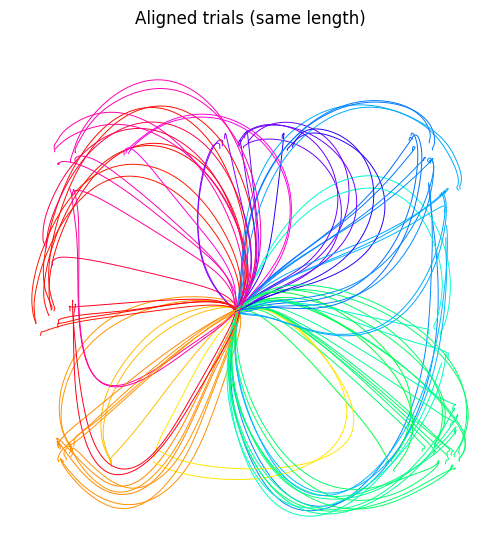

In [92]:
# Trial-averged 108 reach conditions

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Aligned trials (same length)')
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Loop over conditions and compute average trajectory
for cond_idx, cond in enumerate([cond for cond in trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist() if not any(math.isnan(x) for x in cond)]):
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    trial_d = dataset.make_trial_data(align_field='move_onset_time', align_range=(-240, 660), ignored_trials=(~mask))
    traj = trial_d.groupby('align_time')[[('hand_pos', 'x'), ('hand_pos', 'y')]].mean().to_numpy()
    # Determine reach angle for color
    reach_angle = np.arctan2(*trial_info[mask].target_pos.iloc[0][int(trial_info[mask].active_target.iloc[0])][::-1])
    # Plot reach
    ax.plot(traj[:, 0], traj[:, 1], linewidth=0.7, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))
    
plt.axis('off')
plt.savefig('trial_averged_reaches_108')
plt.show()

In [99]:
y_data = y
y_vel = labels
y_conds = conds
y_t_pos = target_pos
act_t = active_target

In [100]:
def get_cond_trials(y_vel, y_conds):
    psth = np.zeros((len(conds_ids), y_vel.shape[1], y_vel.shape[2]))

    for cond in conds_ids:
        mask = y_conds == cond
        psth[cond, :, :] = y_vel[mask, :, :].mean(axis=0)
    
    return psth

def calc_var_to_mean_ratio(psth):
    v_m_ratio =  np.sum((psth.var(axis=0)) / (psth.mean(axis=0)), axis=0)
    
    return(np.nan_to_num(v_m_ratio, nan=0))

In [101]:
psth = get_cond_trials(y_vel, y_conds)

In [102]:
psth.shape

(108, 180, 2)

In [103]:
vmr = calc_var_to_mean_ratio(psth)

In [104]:
vmr

array([  57284.25618751, -319179.54165195])

In [132]:
psth[0, 0, :]

array([-1.14912322, -2.64514294])

In [121]:
# Compute the variance for each tensor along the specified dimension
var = [t.var(axis=0).mean().item() for t in psth[0, :, :]]

In [130]:
var

[0.5595187481675514,
 0.5788914439212908,
 0.5759841073348106,
 0.5692365215691535,
 0.5751935884435675,
 0.569367028575041,
 0.5752097722664602,
 0.5790587700881271,
 0.5791420617537997,
 0.5745269432333353,
 0.5798664404498546,
 0.5942747991813007,
 0.5763821299252923,
 0.5766239526327579,
 0.5823770255198369,
 0.5868188024030783,
 0.5850853225148027,
 0.5859894096650451,
 0.581008555899613,
 0.5780547522088467,
 0.5660736361189644,
 0.5776748335749289,
 0.5810534646761651,
 0.5811228382049871,
 0.5998848670842554,
 0.6045713221873253,
 0.6200262096711888,
 0.6348075176250929,
 0.648226395272002,
 0.6508927893350822,
 0.6472619510067041,
 0.6603826753245186,
 0.6601905285516435,
 0.6597236833928163,
 0.6656807145318484,
 0.6661316037984988,
 0.6834023738461132,
 0.6983619449916537,
 0.7014216750692935,
 0.7207041888810436,
 0.7263681414029537,
 0.7130962399177869,
 0.7171149492139515,
 0.7083806320101912,
 0.7168512730681629,
 0.7224489994183314,
 0.712419644138131,
 0.72599118164388

In [128]:
np.array(var).shape

(180,)

In [119]:
psth[0, :, :].shape

(180, 2)

In [ ]:


# Sort the tensors based on the calculated variances
sorted_tensors = [tensor for _, tensor in sorted(zip(variances, tensors), key=lambda x: x[0])]

# Output the sorted tensors
for i, tensor in enumerate(sorted_tensors):
    print(f"Tensor {i+1}:\n{tensor}\n")

In [ ]:
psth[0, :, :]